In [11]:
import pandas as pd
df = pd.read_csv("../dataset/archive/winequality-red.csv",sep=";")

# 一个映射字典，用于将质量值从 0 到 5 进行映射
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
 }
# 你可以使用 pandas 的 map 函数以及任何字典，
# 来转换给定列中的值为字典中的值
df.loc[:, "quality"] = df.quality.map(quality_mapping)
# 使用 frac=1 的 sample 方法来打乱 dataframe
# 由于打乱后索引会改变，所以我们重置索引
df = df.sample(frac=1).reset_index(drop=True)
# 选取前 1000 行作为训练数据
df_train = df.head(1000)
# 选取最后的 599 行作为测试/验证数据
df_test = df.tail(599)





In [23]:
# 从 scikit-learn 导入需要的模块
from sklearn import tree
from sklearn import metrics
# 初始化一个决策树分类器，设置最大深度为 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# 选择你想要训练模型的列
# 这些列作为模型的特征
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
 # 使用之前映射的质量以及提供的特征来训练模型
clf.fit(df_train[cols], df_train.quality)
print(len(df_train[cols]))
print(len(df_train.quality))


1000
1000


In [20]:
# 在训练集上生成预测

train_predictions = clf.predict(df_train[cols])
# 在测试集上生成预测
test_predictions = clf.predict(df_test[cols])
 # 计算训练数据集上预测的准确度
train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
 )
 # 计算测试数据集上预测的准确度
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)
print("The training accuracy is", train_accuracy)
print("The test accuracy is", test_accuracy)

The training accuracy is 0.784
The test accuracy is 0.5776293823038398


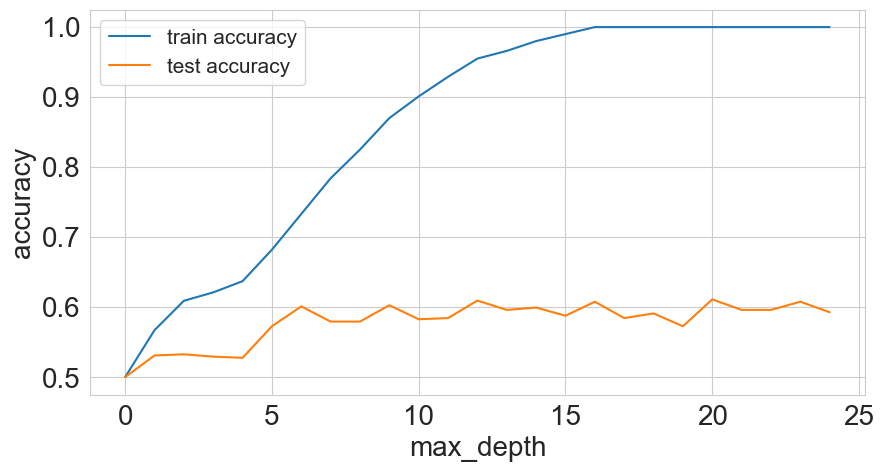

In [25]:
# 注意：这段代码在 Jupyter 笔记本中编写
# 导入 scikit-learn 的 tree 和 metrics
from sklearn import tree
from sklearn import metrics
# 导入 matplotlib 和 seaborn
# 用于绘图
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局标签文本的大小
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# 确保图表直接在笔记本内显示
%matplotlib inline
# 初始化用于存储训练和测试准确度的列表
# 我们从 50% 的准确度开始
train_accuracies = [0.5]
test_accuracies = [0.5]
# 遍历几个不同的树深度值
for depth in range(1, 25):
 #初始化模型
 clf = tree.DecisionTreeClassifier(max_depth=depth)
 # 选择用于训练的列/特征
 cols = [
  'fixed acidity', 'volatile acidity', 'citric acid',
  'residual sugar', 'chlorides', 'free sulfur dioxide',
  'total sulfur dioxide', 'density', 'pH',
  'sulphates', 'alcohol'
 ]
 
 # 在给定特征上拟合模型
 clf.fit(df_train[cols], df_train.quality)
 
 # 创建训练和测试预测
 train_predictions = clf.predict(df_train[cols])
 test_predictions = clf.predict(df_test[cols])
 
 # 计算训练和测试准确度
 train_accuracy = metrics.accuracy_score(
  df_train.quality, train_predictions
 )
 test_accuracy = metrics.accuracy_score(
  df_test.quality, test_predictions
 )
 
 # 添加准确度到列表
 train_accuracies.append(train_accuracy)
 test_accuracies.append(test_accuracy)

# 使用 matplotlib 和 seaborn 创建两个图
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()